In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
data_dir = '../datasets/train/all_image/patient10_C0.nii.gz'
img = nib.load(data_dir)
img = img.get_fdata()

In [2]:
print(img.shape)
print(img.dtype)
print(img.max())
print(img.min())
print(img.mean())
print(img.std())

(256, 256, 10)
float64
4202.0
0.0
287.6246047973633
404.91626528062017


<class 'numpy.ndarray'>
2460.0
0.0
float64


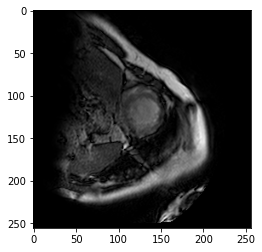

In [3]:
slices = img[:,:,1]
print(type(slices))
print(slices.max())
print(slices.min())
print(slices.dtype)
plt.imshow(slices,cmap='gray')

(256, 256)
255.0
0.0


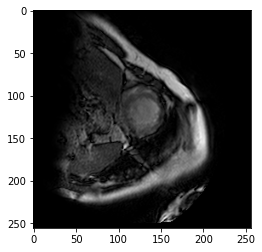

In [4]:
# 归化到0至255
slices_1 = slices / (slices.max()-slices.min()) * 255.0
print(slices_1.shape)
print(slices_1.max())
print(slices_1.min())
plt.imshow(slices_1,cmap='gray')

1.0
-1.0


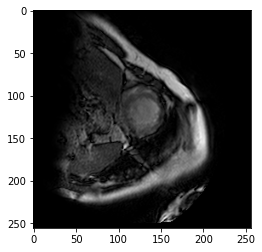

In [5]:
# 标准化到-1至1
slices_2 = slices_1 / 255.0
mean = 0.5
std = 0.5
slices_2 = (slices_2-mean)/std
print(slices_2.max())
print(slices_2.min())
plt.imshow(slices_2,cmap='gray')

255.0
0.0


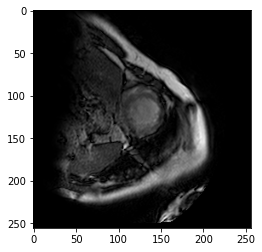

In [6]:
# denormalization
def denormalization(img):
    mean = 0.5
    std = 0.5
    de_img = img * std + mean
    de_img = de_img * 255.0
    return de_img
    
de_img = denormalization(slices_2)
print(de_img.max())
print(de_img.min())
plt.imshow(de_img,cmap='gray')

In [15]:
# save image as .nii
# 0-255
s1 = slices_1
print(type(s1))
print(s1.dtype)
print(s1.shape)
print(s1.max())
print(s1.min())
s1 = np.expand_dims(s1,axis=0)
print(s1.shape)

nii_file = sitk.GetImageFromArray(s1)
sitk.WriteImage(nii_file,'../datasets/train/fake_lge_label/s1.nii')

<class 'numpy.ndarray'>
float64
(256, 256)
255.0
0.0
(1, 256, 256)


<class 'numpy.ndarray'>
float64
(1, 256, 256)


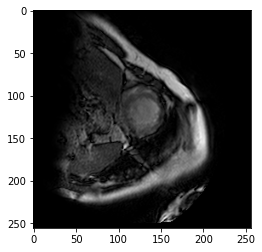

In [16]:
# read from .nii
img = sitk.ReadImage('../datasets/train/fake_lge_label/s1.nii')
img = sitk.GetArrayFromImage(img)
print(type(img))
print(img.dtype)
print(img.shape)
img = img[0,:,:]
plt.imshow(img,cmap='gray')

In [18]:
# make sure s1 == img
print((s1==img).all())

True
